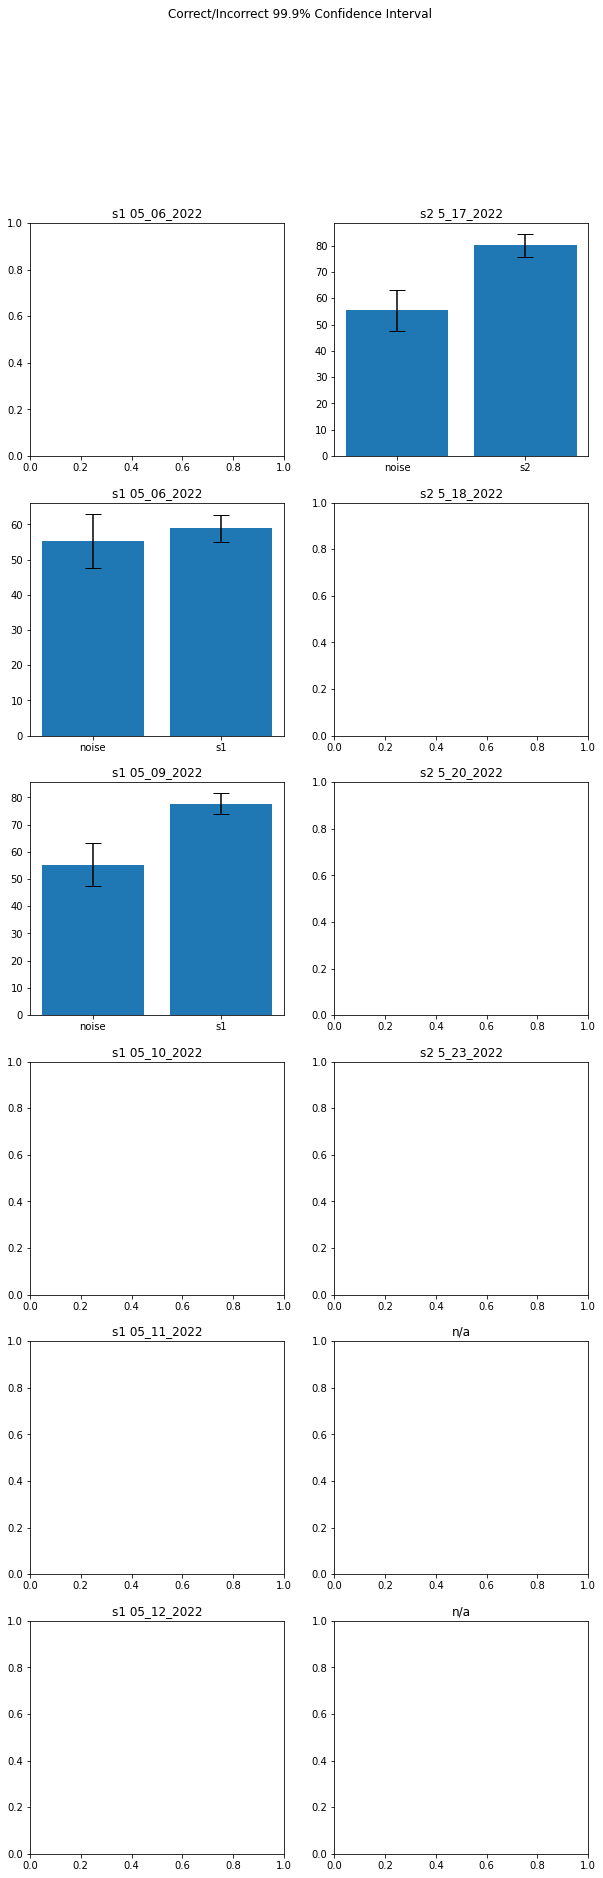

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import math

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(10,30))
fig.suptitle("Correct/Incorrect 99.9% Confidence Interval")
legs = 8
b_acc = 55.3333
b_stdev = 23.5106

def conf(stdev, level=0.999, trials=100):
    if level==0.95:
        z = 1.960
    elif level==0.99:
        z=2.576
    elif level==0.999:
        z=3.291
    return z*stdev/math.sqrt(trials)

def plot(x,y,title,acc,stdev,b_acc=b_acc,b_stdev=b_stdev):
    ax[x,y].title.set_text(title)
    if acc!=0:
        ax[x,y].bar(["noise",title[:2]], [b_acc,acc], yerr=[conf(b_stdev), conf(stdev)], capsize=legs)

plot(0,0,"s1 05_06_2022",0,0)
plot(1,0,"s1 05_06_2022",58.8889,11.8399)
plot(2,0,"s1 05_09_2022",77.7059,11.6471)
plot(3,0,"s1 05_10_2022",0,0)
plot(4,0,"s1 05_11_2022",0,0)
plot(5,0,"s1 05_12_2022",0,0)

plot(0,1, "s2 5_17_2022",80.0769,13.1020)
plot(1,1, "s2 5_18_2022",0,0)
plot(2,1, "s2 5_20_2022",0,0)
plot(3,1, "s2 5_23_2022",0,0)
plot(4,1, "n/a",0,0)
plot(5,1, "n/a",0,0)